In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mord import LogisticAT
from collections import OrderedDict
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [83]:
df = pd.read_json('data.json')

In [84]:
df

,normalized_sclera_area,width_over_height,label
0,0.341435,2.000000,wide
1,0.273199,2.533333,wide
2,0.312066,2.181818,wide
3,0.310704,2.130435,wide
4,0.277127,2.526316,wide
...,...,...,...
8709,0.012524,20.000000,closed
8710,0.024852,20.000000,closed
8711,0.018644,20.000000,closed
8712,0.064209,9.666667,closed


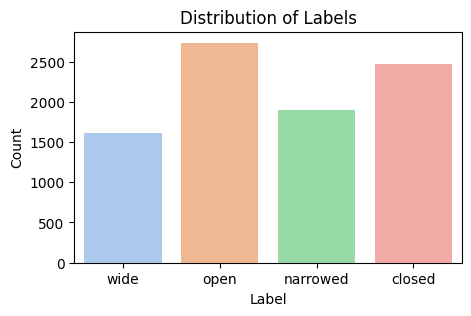

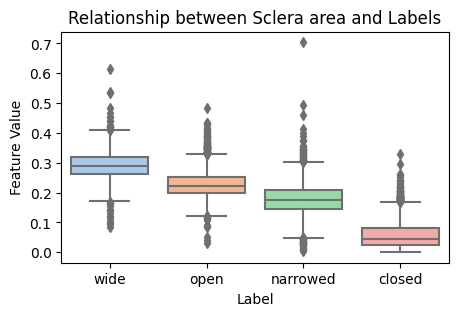

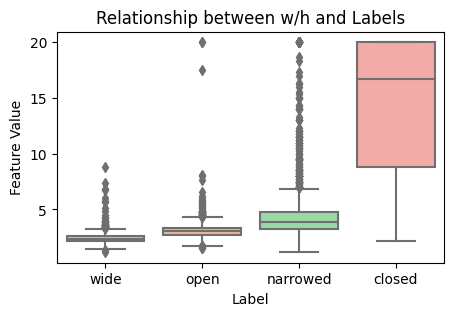

In [85]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='label', palette='pastel')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='label', y='normalized_sclera_area', palette='pastel')
plt.title('Relationship between Sclera area and Labels')
plt.xlabel('Label')
plt.ylabel('Feature Value')
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='label', y='width_over_height', palette='pastel')
plt.title('Relationship between w/h and Labels')
plt.xlabel('Label')
plt.ylabel('Feature Value')
plt.show()

In [86]:
ordinal_mapping = OrderedDict({
    "wide": 0,
    "open": 1,
    "narrowed": 2,
    "closed": 3
})

In [87]:
X = df[['normalized_sclera_area', 'width_over_height']].values
y = df['label'].map(ordinal_mapping).values

In [88]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [89]:
classifier = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticAT())
])

classifier.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', LogisticAT())])

In [90]:
y_train_pred = cross_val_predict(classifier, X, y, cv=100)
y_train_pred

array([0, 1, 0, ..., 3, 3, 3])

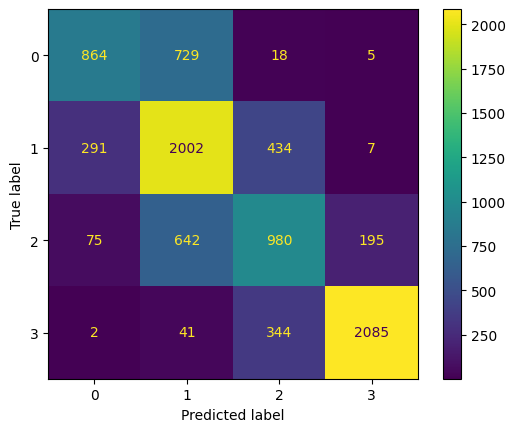

In [91]:
mat = confusion_matrix(y, y_train_pred)
ConfusionMatrixDisplay(mat, display_labels=classifier.classes_).plot()

In [92]:
precision = precision_score(y, y_train_pred, average='weighted')
recall = recall_score(y, y_train_pred, average='weighted')
f1_score = 2 * (precision * recall) / (precision + recall)

print(precision)
print(recall)
print(f1_score)

0.691908780208598
0.6806288730778058
0.6862224758911571


In [93]:
probabilities = classifier.predict_proba(X)
probabilities

array([[8.50655018e-01, 1.40291389e-01, 8.48107914e-03, 5.72513688e-04],
       [4.16687958e-01, 5.15409659e-01, 6.33555578e-02, 4.54682509e-03],
       [7.01315641e-01, 2.77001711e-01, 2.02949563e-02, 1.38769266e-03],
       ...,
       [2.80035986e-05, 5.09843381e-04, 7.97190755e-03, 9.91490245e-01],
       [5.26593884e-04, 9.49636767e-03, 1.29003358e-01, 8.60973681e-01],
       [1.99241321e-04, 3.61556425e-03, 5.37453764e-02, 9.42439818e-01]])

In [94]:
import pickle

pickle.dump(classifier, open('eyecloseness_model.pkl','wb'))